## Assignment-05

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [27]:
random_data = np.random.random((100, 2))  

In [78]:
#random_data

In [29]:
X = random_data[:,0]  
y = random_data[:,1] 

In [30]:
def assmuing_function(x):
    # 体重 -> 高血压的概率
    # 收入 -> 买豪车的概率
    # 实质是一种潜在的函数关系 + 一个随机变化
    return 15.4 * x + 3 + random.randint(-1,1)   

In [31]:
y = [assmuing_function(x) for x in X] 

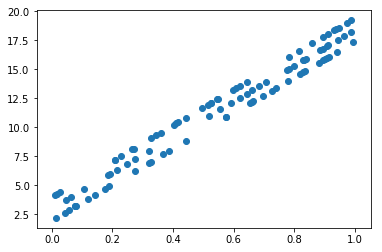

In [33]:
plt.scatter(X,y)  

In [35]:
y = np.array(y)  #数组

In [36]:
reg = LinearRegression().fit(X.reshape(-1,1),y) #reshape,改变数组，y是训练的目标，是预测的值，fit是训练拟合，返回的是训练好的模型

In [37]:
X.shape

(100,)

In [40]:
#X #一维数据

In [41]:
#X.reshape(-1,1) #二维数据，一个[]表示1维，2个[]表示2维。

In [42]:
reg.coef_ #系数

array([15.45610614])

In [43]:
reg.intercept_  #偏置/截距

2.9693119593490405

In [45]:
def f(x):
    return reg.coef_ * x + reg.intercept_  

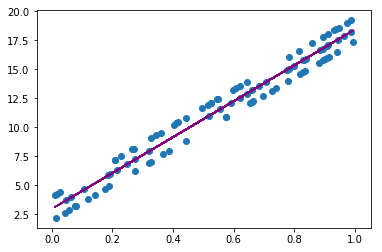

In [46]:
plt.scatter(X,y)
plt.plot(X,f(X),color='purple')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

In [61]:
from collections import Counter
from scipy.spatial.distance import cosine

In [62]:
random_data = np.random.random((20,2)) 
X = random_data[:,0]
y = random_data[:,1]

In [63]:
y = (y >= 0.4) + 0  #y>0.4就是1类，小于0.4就是0类,高级写法

In [64]:
def model(X,y):
    return[(Xi,yi) for Xi,yi in zip(X,y)] #KNN的模型只是记录，把所有的点计入到list。列表里面是元组

In [65]:
def distance(x1, x2):
    return cosine(x1,x2)  #用cosine计算两个点，夹角越小，越相近。

In [66]:
def predict(x,k=5):  #k个最近的邻居，物以类聚。 
    most_similars = sorted(model(X,y),key=lambda xi: distance(xi[0],x))[:k] #计算所有点的距离，排序。[:k]前k个。
    #对元组排序，需要指明Key。xi是一个元组，第0个元素是x，对特征算距离。
    #需要做的是对5个点进行投票操作，然后选出属于哪一类   
    target_list = [x[1] for x in most_similars] # 目标的列表，每个邻居都有对应的标签
    label = Counter(target_list).most_common()[0][0] #投票操作,第一个[0]目标label，第二个[0]投票的，most_common为元组的字典
    return label

In [67]:
predict(0.3,1)

1

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

In [48]:
from collections import Counter
import pandas as pd
import numpy as np
from icecream import ic

In [ ]:
#Entropy(S) = -(P/|S|)log2(P/|S|)-(N/|S|)log2(N/|S|) 。熵，不确定性, 根据熵决定分裂的节点。

In [49]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log2(p) for p in probs) #算每个特征的熵，分类根据特征。

In [50]:
entropy([0,0,0,0])

-0.0

In [51]:
entropy([1,0]) #有波动，不确定越高

1.0

In [52]:
#随机构建数据，根据性别、收入、成员数目，预测是否会买房子
mock_data = {
    'gender':['F','F','F','F','M','M','M'],
    'income':['+10','-10','+10','+10','+10','+10','-10'],
    'family_number':[1,1,2,1,1,1,2],
    'bought':[1,1,1,0,0,0,1],
}

In [53]:
dataset = pd.DataFrame.from_dict(mock_data)

In [54]:
dataset #有3个feature可以做判断，gender,income,family_number

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [55]:
set(mock_data['family_number'])  

{1, 2}

In [56]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist() 

In [57]:
sub_split_1  

[1, 1, 0, 0, 0]

In [58]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [59]:
sub_split_2

[1, 1]

In [60]:
5/7*entropy(sub_split_1) + 2/7*entropy(sub_split_2)

1.7029146752921864

In [61]:
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist() #'女'

In [62]:
_sub_split_2

[1, 1, 1, 0]

In [63]:
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()#‘男’

In [64]:
_sub_split_1

[0, 0, 1]

In [65]:
3/7*entropy(_sub_split_1) + 4/7*entropy(_sub_split_2)

1.3800214281593393

In [66]:
dataset.columns.tolist()

['gender', 'income', 'family_number', 'bought']

In [67]:
def find_the_min_spliter(training_data: pd.DataFrame, target:str) -> str:
    """找出最小的进行拆分。
    """
    x_fields =  set(training_data.columns.tolist()) - {target} #去掉target"bought"
    
    spliter = None
    min_entropy = float('inf') #inf正无穷
    
    for f in x_fields:  #遍历
        ic(f)
        values = set(training_data[f]) ##这里面的f就是每条记录的结果,类似于列的列头,然后把所有的结果进行统计，放到数组里面
        ic(values)
        for v in values: #对每个可能性做循环，对分裂后的每一个计算条件熵
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist() #分裂节点的可能性，target为标签，看取值的可能性
            ic(sub_split_1)
            entropy_1 = entropy(sub_spliter_1) #第一个信息熵
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist() #不等于v的可能性多少
            ic(sub_split_2)
            entropy_2 =entropy(sub_spliter_2)
            ic(entropy_2)
            rate_1 = len(training_data[training_data[f] == v]) / len(training_data)
            rate_2 = len(training_data[training_data[f] != v]) / len(training_data)        
            entropy_v = rate_1*entropy_1 + rate_2*entropy_2  
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
    print('spliter is :{}'.format(spliter))
    print('the min entropy is:{}'.format(min_entropy))
    
    return spliter
    
    

In [68]:
find_the_min_spliter(dataset,'bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 2.384080545409061
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 1.7029146752921864
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| entropy_2: 2.384080545409061
ic| entropy_v: 1.7029146752921864
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 2.384080545409061
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 1.7029146752921864
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| entropy_2: 2.384080545409061
ic| entropy_v: 1.7029146752921864
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 1.4338343733773984
ic| sub_split_2: [1, 1]
ic| entropy_2: 1.3082708345352603
ic| entropy_v: 1.3800214281593393
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 1.3082708345352603
ic| sub_split_2: [1, 1]
ic| entropy_2: 1.4338343733773984
ic| entropy_v: 1

spliter is :('gender', 'M')
the min entropy is:1.3800214281593393


('gender', 'M')

In [73]:
sub_df = dataset[dataset['family_number'] == 1]

In [74]:
dataset[dataset['gender'] != 'F']

,gender,income,family_number,bought
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [75]:
dataset[dataset['gender'] != 'M']

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0


In [77]:
find_the_min_spliter(sub_df[sub_df['gender'] != 'M'], 'bought')

ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 1.3082708345352603
ic| sub_split_2: [1, 1]
ic| entropy_2: 0
ic| entropy_v: 1.3082708345352603
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 1.0
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6666666666666666
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| entropy_2: 1.0
ic| entropy_v: 0.6666666666666666
ic| f: 'gender'
ic| values: {'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 1.3082708345352603
ic| sub_split_2: [1, 1]
ic| entropy_2: 0
ic| entropy_v: 1.3082708345352603


spliter is :('income', '-10')
the min entropy is:0.6666666666666666


('income', '-10')

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

模型是求解学习问题的一系列前提假设/inductive bias，根据已知数据寻找模型参数的过程就是训练，最终搜索到的映射f被称为训练出来的模型。


"所有模型都是错的，但有些是有用的。"出自于统计学家George Box。

所有模型都只是模拟真实世界的一种工具，正如科学是探索真实世界的一种方法一样，并没有绝对的真理，而是通过不断地提出假设并进行实证来否定之前错误的观点，从而在不断纠错中持续前进。无论是什么模型，都有可能被证明是错误的，也很容易被更好的模型所替代。但是只要建模时能深入地理解数据的本质和模型的内涵，总是能使得模型可以解决现实的问题，这就已经足够了。

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:
**欠拟合** 当模型在训练集和测试集表现得都不好时候我们称这种现象为欠拟合。

**过拟合** 过拟合指的是训练数据拟合程度过高的情况，也就是说模型在训练集上表现得好，但是在测试集合新的数据集上表现较差。类比女友化妆。

**欠拟合出现的原因**
1.模型复杂度过低
2.特征量过少

**过拟合出现的原因**
1.建模样本选取有误，如样本数量太少，选样方法错误，样本标签错误等，导致选取的样本数据不足以代表预定的分类规则
2.样本噪音干扰过大，使得机器将部分噪音认为是特征从而扰乱了预设的分类规则
3.假设的模型无法合理存在，或者说是假设成立的条件实际并不成立
4.参数太多，模型复杂多过高

**降低过拟合**
1.增加数据量。更多的数据可以让模型学习到更多的有效特征，减小噪声的影响，从另一方面上讲，增加数据的数量也起到了减小方差的作用。
2.降低模型的复杂度。神经网络：减少网络的层数，减少每一层网络的神经元个数。树模型：减枝，降低树的深度。
3.正则化：L1：绝对值之和，让一部分特征缩小到0，常用于特征选择。L2:平方之和，让特征的系数都进行缩小，使求解稳定快速。
4.集成学习方法，多模型进行融合。
Boosting：该类模型中，后一个模型的输入会受到前一个模型的输出的影响。
Bagging：该模型中，模型之间相互独立，没有过大影响。

**降低欠拟合**
1.增加新的特征。
2.增加模型的复杂度。简单的模型学习能力较差，通过增加模型的复杂度可以使模型有更强的拟合能力。
3.减少正则化的系数。正则化是用来防止过拟合的，当模型欠拟合时我们需要有针对的减少他们的系数。
4.使用非线性模型。


#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

**精确率**Precison:预测为正样本中有多少正确的概率。公式=正确识别的个体总数 /  识别出的个体总数。Precision = TP / TP+FP。

**召回率**Recall:也叫查全率，反映正样本被预测为正的比例。公式=正确识别的个体总数 /  测试集中存在的个体总数。Recall = TP / TP + FN。

**准确率**Accuracy:所有正确分类的样本与总样本比例。Accuracy = TP+TN /TP + TN + FN + FN。

**AUC** Area Under Curve：ROC曲线下的面积（ROC的积分），通常大于0.5小于1。随机挑选一个正样本以及一个负样本，分类器判定正样本的值高于负样本的概率就是AUC直。AUC值（面积）越大的分类器，性能越好。

**F1**:F1分数的公式为 = 2*查准率*查全率 / (查准率 + 查全率).F1 = 2Precision*Recall/Precision+Recall。

**F2**: 在公式中β=2. F2 = (1+β**2)×Precision×Recall /β**2（Precision+Recall）



#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:机器学习是一门涉及统计学、系统辨识、逼近理论、神经网络、优化理论、计算机科学、脑科学等诸多领域的交叉学科，研究计算机怎样模拟或实现人类的学习行为，以获取新的知识和技能，重新组织已有的知识结构使之不断改善自身的性能，是人工智能技术的核心。基于数据的机器学习是现代智能技术中的重要方法之一，研究从观测数据（样本）出发寻找规律，利用这些规律对未来数据或无法观测的数据进行预测。根据学习模式、学习方法以及算法的不同，机器学习有不同的分类方法：
1）根据学习模式将机器学习分为监督学习、无监督学习和强化学习等；
2）根据学习方法可以将机器学习氛围传统机器学习和深度学习；
3）此外，机器学习的常见算法还包括迁移学习、主动学习和演化学习等。

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

评价指标是机器学习任务中非常重要的一环。不同的机器学习任务有着不同的评价指标，同时同一种机器学习任务也有着不同的评价指标，每个指标的着重点不一样。

不同的机器学习任务有着不同的性能评价指标。例如，在垃圾邮件检测系统中，这个系统本质上是一个二分类问题（区分垃圾邮件vs正常邮件），可以使用准确率（Accuracy）、对数损失函数（log-loss）、AUC等评价方法。在股票预测中，这其实是一个实数序列数据预测问题，可以使用平方根误差（root mean square error， RMSE）等指标；又如在搜索引擎中进行与查询相关的项目排序中，可以使用精确率－召回率（precision-recall）等等。

在对比不同模型的能力时，使用不同的评价指标可能会导致不同的结果，这就说明：模型的好坏是相对的，好的模型不仅仅取决于数据和算法，还取决于场景需求。

"正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半"。 站在不同角度会得到不同的答案。

对于任务型人际对话系统，主流评价思路仍然是以人工评价结果为目标。事实上，对话系统评价的最终目标是评测用户的满意度，但总有许多因素造成我们无法将评价结果与用户的体验完全吻合，即使通过给出的人工制定的评价指标来对一个系统进行测评，也会造成不同程度的偏差，而且也很难将所有特征罗列出来加以对比达到全面的评价效果，因此现有的评价过程大都无法准确的满足用户的要求。

对于开放域的人际对话系统，目前的的评价指标包括两个大房企：客观指标和模拟评分。客观指标主要包含词重叠评价句子和基于词向量的评价矩阵。模拟人工评分主要是通过神经网络的训练方法，用于机器来模拟人的打分过程，从而实现对对话系统的评价。但是这些方法都有自己的步骤，如评价句子更多的是用于非对话系统的其他NLP任务中，还没有针对人机对话任务进行很好的整合迁移；而直接抛开细节的评分模拟，很可能也忽略了重要的因素，所以效果不是非常出众。所以，对于对话系统评价的研究还有很多的空间可以探索。对于题目我认为不对，怎么去设置一个完整的平价标准，但是理想的评价标准不好实现，会带来新的问题，怎么用算法去实现一个复杂的目标。比如对话系统，设定的评价标准跟人工一模一样，这个评价标准就设定的不太好。

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [104]:
from collections import Counter
import pandas as pd
import numpy as np

In [108]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log2(p) for p in probs)

In [143]:
#创建数据集
def createDateSet():     
    mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
    dataSet = pd.DataFrame(mock_data)
    return dataSet

In [145]:
dataSet=createDateSet()
dataSet

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [114]:
def find_the_min_spliter(training_data: pd.DataFrame, target:str) -> str:
    """找出最小的进行拆分。
    """
    x_fields =  set(training_data.columns.tolist()) - {target} #去掉target"bought"
    
    spliter = None
    min_entropy = float('inf') #inf正无穷
    
    for f in x_fields:  #遍历
        values = set(training_data[f]) ##这里面的f就是每条记录的结果,类似于列的列头,然后把所有的结果进行统计，放到数组里面
        for v in values: #对每个可能性做循环，对分裂后的每一个计算条件熵
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist() #分裂节点的可能性，target为标签，看取值的可能性
            entropy_1 = entropy(sub_spliter_1) #第一个信息熵
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist() #不等于v的可能性多少
            
            entropy_2 =entropy(sub_spliter_2)
           
            rate_1 = len(training_data[training_data[f] == v]) / len(training_data)
            rate_2 = len(training_data[training_data[f] != v]) / len(training_data)        
            entropy_v = rate_1*entropy_1 + rate_2*entropy_2  
            
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)    #元组，feature,value
    print('spliter is :{}'.format(spliter))
    print('the min entropy is:{}'.format(min_entropy))
    
    return spliter

In [146]:
#构建决策树
def createTree(dataSet):
    featlist = list(dataSet.columns)                          #提取出数据集所有的列
    classlist = dataSet['bought'].value_counts()              #取最后一列标签 
    if len(classlist)==1 or dataSet.shape[1]==1:    
        return classlist.index[0]                            #[0]是计数最多的
    split_feat = find_the_min_spliter(dataSet,'bought')[0]   #元组取第一号
    myTree = {split_feat:{}}                                 #采用字典嵌套的方式存储树信息
    valuelist = set(dataSet[split_feat])                     #提取最佳切分列所有属性值
    for value in valuelist:                                  #对每一个属性值递归建树
        myTree[split_feat][value] = createTree(dataSet[dataSet[split_feat] == value].drop(split_feat,axis=1))
    return myTree

In [149]:
myTree = createTree(dataSet)
myTree

spliter is :('gender', 'M')
the min entropy is:1.3800214281593393
spliter is :('income', '-10')
the min entropy is:0.9812031259014452
spliter is :('family_number', 2)
the min entropy is:0.6666666666666666
spliter is :('income', '-10')
the min entropy is:-0.0


{'gender': {'F': {'income': {'+10': {'family_number': {1: 1, 2: 1}},
    '-10': 1}},
  'M': {'income': {'+10': 0, '-10': 1}}}}

In [153]:
def predicate(gender, income, family_number, myTree):
    test_sample = {'gender':gender, 'income':income, 'family_number':family_number}
    for key, value in myTree.items():
        if type(value[test_sample[key]]) == dict:
            label = predicate(gender, income, family_number,value[test_sample[key]])
        else:
            label = value[test_sample[key]]
    return label

In [167]:
predicate('M','+10',1,myTree)

0